Finalized Version of Workbook and Data used

In [1]:
# Used Libaries

import pandas as pd
import matplotlib.pyplot as plt
import dpp.cc as cc

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
#Data import and cleaning


datetime_cols = ["call_started", "call_answered", "call_ended"]

df = pd.read_csv(
    "../data/raw/call-centre-queue-simulation/simulated_call_centre.csv",
    parse_dates=["date"]
)

# Remove 'call_id' column if it exists
if 'call_id' in df.columns:
    df = df.drop(columns=['call_id'])

time_format = "%I:%M:%S %p"  # Example: 01:23:45 PM
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format=time_format)

# Remove rows with a service length of less then 10 or negative values
# Manuel check showes that cases with less then 10 seconds are not realistic.
# There are are around 150 Cases with wait time less then 10 seconds those are removed too.
mask_length = (df["call_ended"] - df["call_started"]).dt.total_seconds() >= 10
df = df[mask_length]

# Drop column daily_caller as it value is not needed for further analysis
# If needed can be calculated with groupby on date and count of calls
if 'daily_caller' in df.columns:
    df = df.drop(columns=['daily_caller'])  
  
#Calculate call duration in seconds and handling time in seconds
df["call_duration"] = (df["call_ended"] - df["call_answered"]).dt.total_seconds()
df["handling_time"] = (df["call_ended"] - df["call_started"]).dt.total_seconds()

#reset index after filtering
df = df.reset_index(drop=True)
display (df)
#display (df.dtypes)

,date,call_started,call_answered,call_ended,wait_length,service_length,meets_standard,call_duration,handling_time
0,2021-01-01,1900-01-01 08:00:00,1900-01-01 08:00:00,1900-01-01 08:14:22,0,863,True,862.0,862.0
1,2021-01-01,1900-01-01 08:02:42,1900-01-01 08:02:42,1900-01-01 08:07:31,0,289,True,289.0,289.0
2,2021-01-01,1900-01-01 08:08:24,1900-01-01 08:08:24,1900-01-01 08:10:13,0,108,True,109.0,109.0
3,2021-01-01,1900-01-01 08:09:37,1900-01-01 08:09:37,1900-01-01 08:13:45,0,247,True,248.0,248.0
4,2021-01-01,1900-01-01 08:11:10,1900-01-01 08:11:10,1900-01-01 08:15:28,0,258,True,258.0,258.0
...,...,...,...,...,...,...,...,...,...
50246,2021-12-31,1900-01-01 17:47:30,1900-01-01 17:47:30,1900-01-01 17:49:33,0,123,True,123.0,123.0
50247,2021-12-31,1900-01-01 17:50:10,1900-01-01 17:50:10,1900-01-01 17:57:26,0,436,True,436.0,436.0
50248,2021-12-31,1900-01-01 17:50:31,1900-01-01 17:50:31,1900-01-01 17:54:55,0,265,True,264.0,264.0
50249,2021-12-31,1900-01-01 17:51:29,1900-01-01 17:51:29,1900-01-01 17:54:26,0,177,True,177.0,177.0


In [ ]:
import os

save_path = "../data/processed/CC_Data/"   # change to your desired directory, e.g. "C:/Users/you/plots/"

display (os.listdir(save_path))
print(f"{save_path}weekly_avg.png") 




['.~lock.Übersicht_Data.odp#',
 'test.txt',
 'weekly_avg.png',
 'Übersicht_Data.odp']

../data/processed/CC_Data/weekly_avg.png


In [13]:
display(df.call_duration.mean())
display(df.wait_length.mean())

df[df['date'] >= df['date'].max() - pd.DateOffset(months=3)].mean()


np.float64(307.6310521183658)

np.float64(17.52826809416728)

date                   2021-11-17 00:38:45.175707136
call_started           1900-01-01 12:56:49.204961536
call_answered          1900-01-01 12:57:20.393704704
call_ended             1900-01-01 13:02:25.913437952
wait_length                                31.188923
service_length                            305.522857
meets_standard                              0.855049
call_duration                             305.519733
handling_time                             336.708476
answered_within_60s                         0.855049
dtype: object

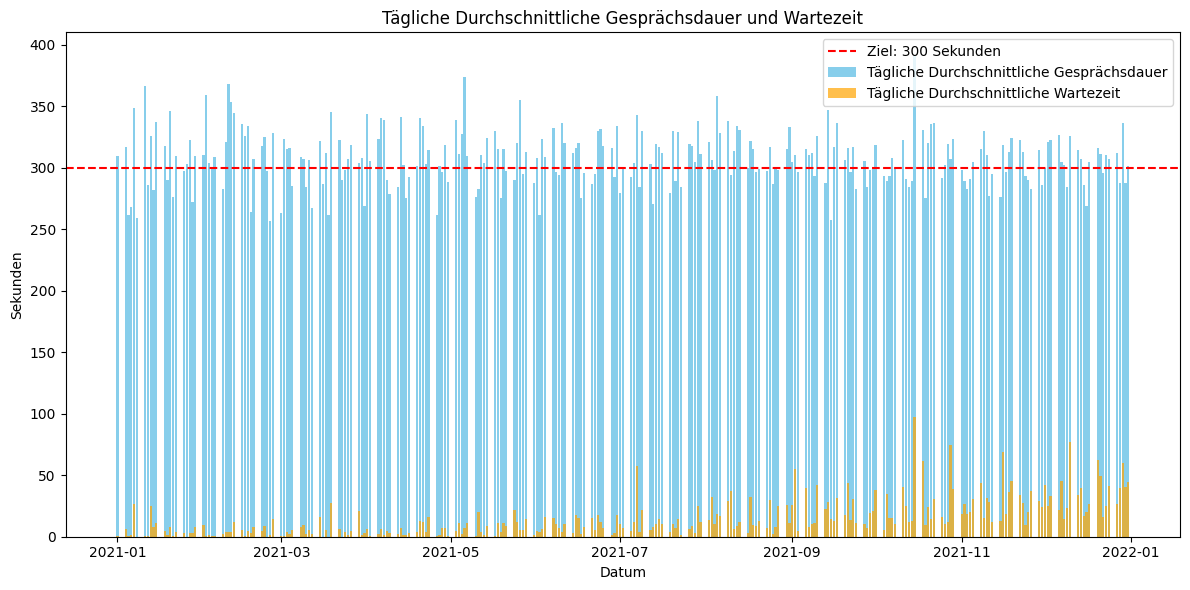

,meets_standard,service_level
date,,
2021-01-01,0.993007,99.300699
2021-01-04,0.953846,95.384615
2021-01-05,1.000000,100.000000
2021-01-06,0.992857,99.285714
2021-01-07,0.916031,91.603053
...,...,...
2021-12-27,0.830040,83.003953
2021-12-28,0.808118,80.811808
2021-12-29,0.785455,78.545455


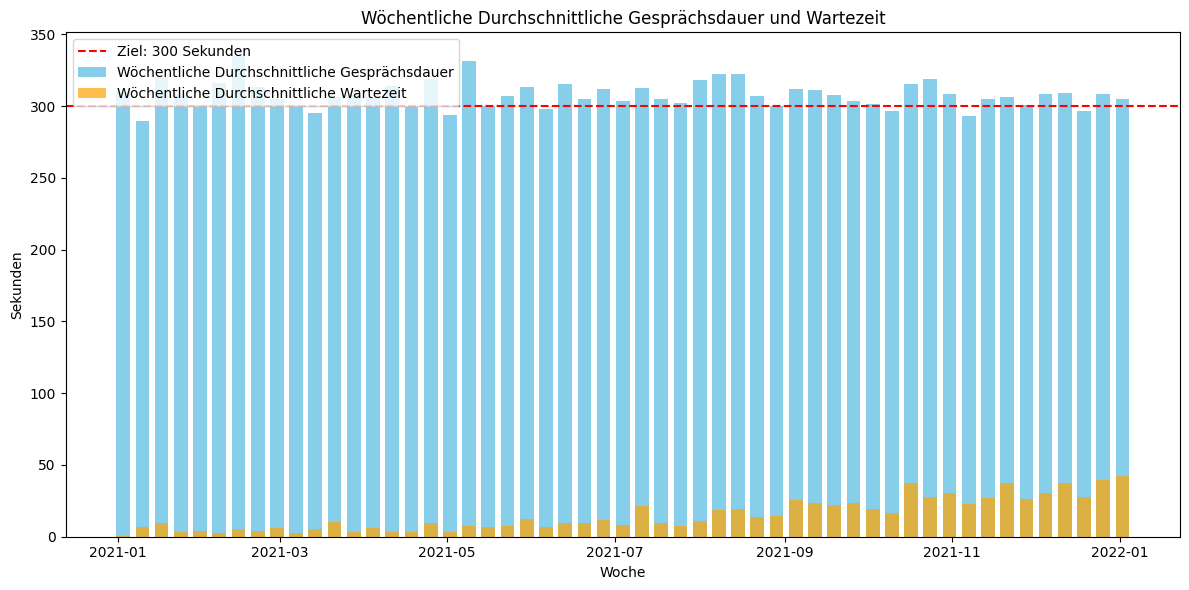

,meets_standard,service_level
date,,
2021-01-03,0.993007,99.300699
2021-01-10,0.973646,97.364568
2021-01-17,0.963068,96.306818
2021-01-24,0.977654,97.765363
2021-01-31,0.977134,97.713415
2021-02-07,0.990528,99.052774
2021-02-14,0.968839,96.883853
2021-02-21,0.975643,97.564276
2021-02-28,0.962868,96.286812


In [4]:
import matplotlib.pyplot as plt
import os
# --- Configuration ---

# C:\Users\avtma\Documents\Python\DPP_Callcenter\data\processed\CC_Data
#           "../data/processed/CC_Data/
save_path = "../data/processed/CC_Data/"  # change to your desired directory, e.g. "C:/Users/you/plots/"

os.makedirs(save_path, exist_ok=True)

target_avg = 300       # Target average call duration in seconds

# --- Daily averages ---
daily_avg_wait_time = df.groupby('date')['wait_length'].mean().reset_index()
daily_avg_call_time = df.groupby('date')['call_duration'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(daily_avg_call_time['date'], daily_avg_call_time['call_duration'], 
        color='skyblue', label='Tägliche Durchschnittliche Gesprächsdauer')
plt.bar(daily_avg_wait_time['date'], daily_avg_wait_time['wait_length'], 
        color='orange', label='Tägliche Durchschnittliche Wartezeit', alpha=0.7)

plt.axhline(y=target_avg, color='r', linestyle='--', label='Ziel: 300 Sekunden')
plt.title('Tägliche Durchschnittliche Gesprächsdauer und Wartezeit') 
plt.xlabel('Datum')
plt.ylabel('Sekunden')   
plt.legend()
plt.tight_layout()

# Save & show
# plt.savefig(f"{save_path}daily_avg.png")   # uncomment to save
plt.show()

# Daily service level
daily_sl = df.groupby('date')['meets_standard'].mean().reset_index()
daily_sl['service_level'] = daily_sl['meets_standard'] * 100
daily_sl = daily_sl.set_index('date')
display(daily_sl)


# --- Weekly averages ---
weekly_avg_call_time = df.resample('W', on='date')['call_duration'].mean().reset_index()
weekly_avg_wait_time = df.resample('W', on='date')['wait_length'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(weekly_avg_call_time['date'], weekly_avg_call_time['call_duration'], 
        width=5, color='skyblue', label='Wöchentliche Durchschnittliche Gesprächsdauer')
plt.bar(weekly_avg_wait_time['date'], weekly_avg_wait_time['wait_length'], 
        width=5, color='orange', label='Wöchentliche Durchschnittliche Wartezeit', alpha=0.7)

plt.axhline(y=target_avg, color='r', linestyle='--', label='Ziel: 300 Sekunden')
plt.title('Wöchentliche Durchschnittliche Gesprächsdauer und Wartezeit') 
plt.xlabel('Woche')
plt.ylabel('Sekunden')   
plt.legend()
plt.tight_layout()

# Save & show
plt.savefig(f"{save_path}weekly_avg.png")   # uncomment to save
plt.show()

# Weekly service level
weekly_sl = df.resample('W', on='date')['meets_standard'].mean().reset_index()
weekly_sl['service_level'] = weekly_sl['meets_standard'] * 100
weekly_sl = weekly_sl.set_index('date')
display(weekly_sl)


C:\Users\avtma\AppData\Local\Temp\ipykernel_24296\4226394238.py:47: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_3_months_avg = ts_calls.last('90D').mean()


Durchschnittliche Anrufe der letzten 3 Monate: 248.9
Durchschnittlicher historischer Servicelevel: 92.7%


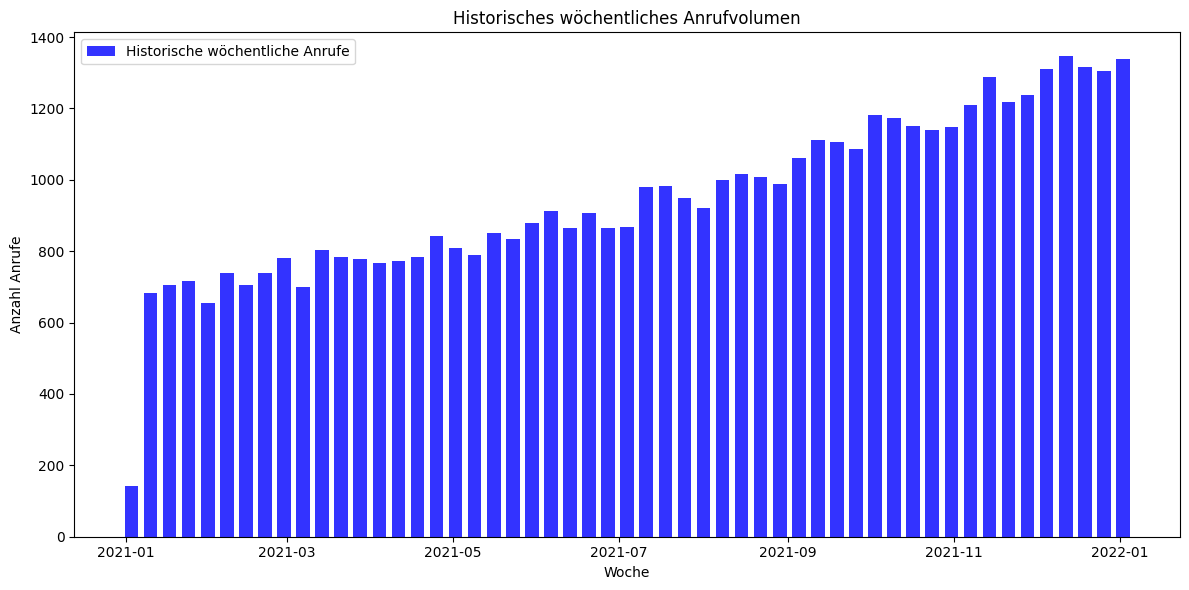

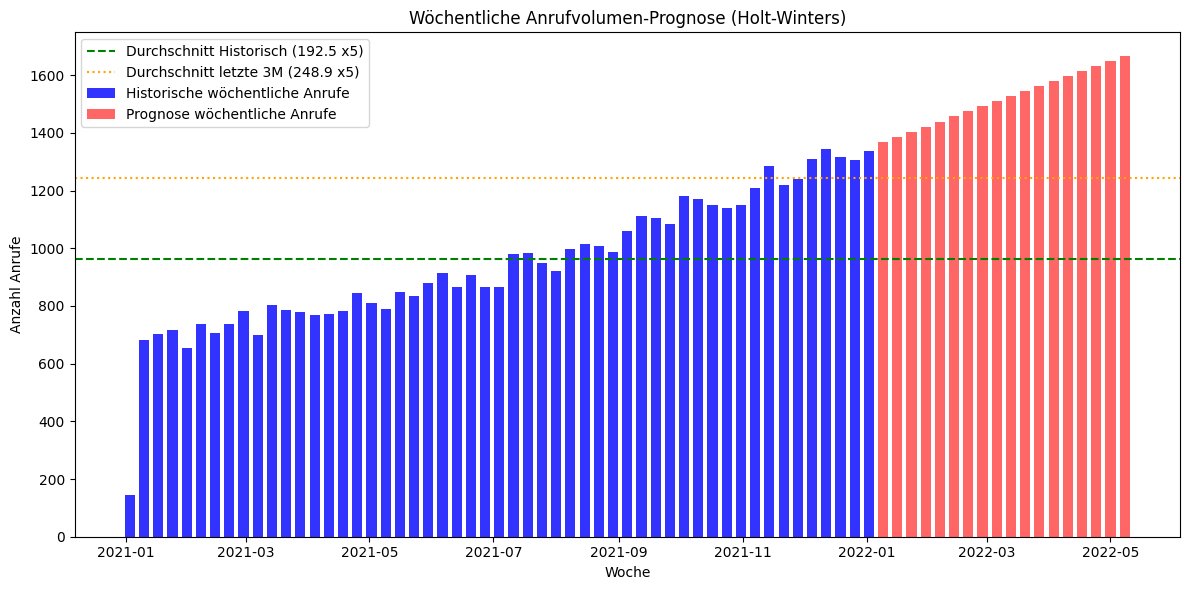

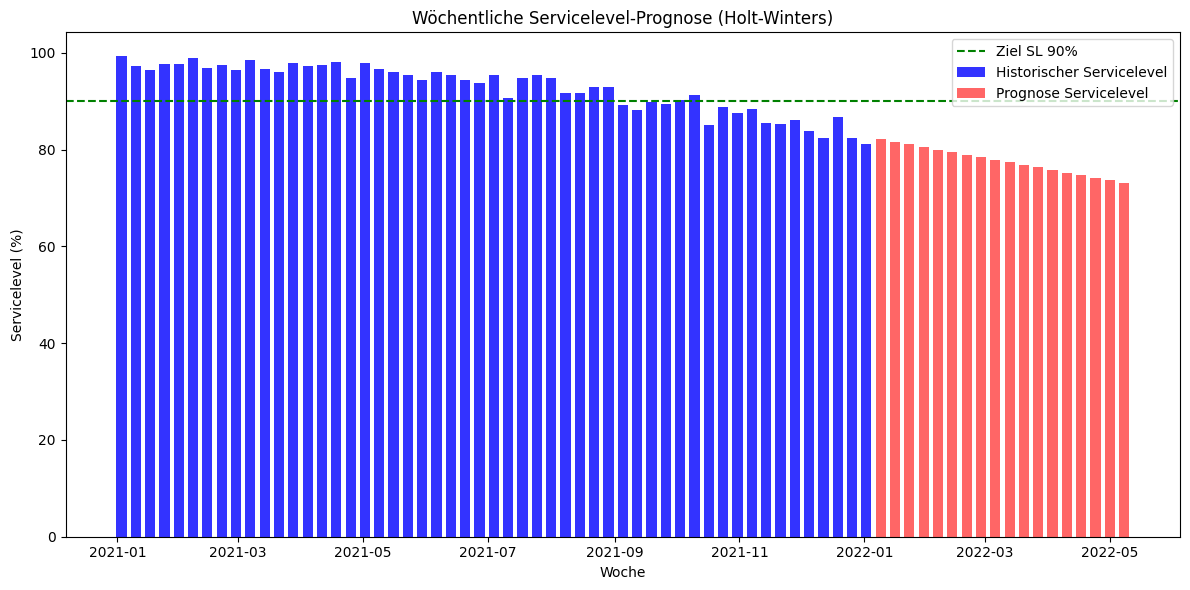

In [5]:
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- Konfiguration ---
#save_path = "../data/processed/"
os.makedirs(save_path, exist_ok=True)
bar_width = 5  # breitere Balken

# --- Parameter ---
forecast_days = 90
week_days     = 5

# --- Datenaufbereitung ---
df["answered_within_60s"] = (df["wait_length"] <= 60).astype(int)
agg = (
    df.groupby("date")
    .agg(
        total_calls=("call_started", "count"),
        servicelevel=("answered_within_60s", "mean"),
    )
    .reset_index()
)

# Zeitreihen mit expliziter Frequenz (Werktage)
ts_calls = agg.set_index('date')['total_calls'].asfreq('B')
ts_sl = agg.set_index('date')['servicelevel'].asfreq('B') * 100  # in %

# --- Prognose mit Holt-Winters ---
model_calls = ExponentialSmoothing(ts_calls, trend="add", seasonal="add", seasonal_periods=week_days)
fit_calls = model_calls.fit()
forecast_calls = fit_calls.forecast(forecast_days)

model_sl = ExponentialSmoothing(ts_sl, trend="add", seasonal="add", seasonal_periods=week_days)
fit_sl = model_sl.fit()
forecast_sl = fit_sl.forecast(forecast_days)

# --- Wöchentliche Resampling ---
weekly_calls = ts_calls.resample("W").sum()
weekly_forecast_calls = forecast_calls.resample("W").sum()

weekly_sl = ts_sl.resample("W").mean()
weekly_forecast_sl = forecast_sl.resample("W").mean()

# --- Durchschnitte ---
avg_calls = ts_calls.mean()
last_3_months_avg = ts_calls.last('90D').mean()
avg_sl = ts_sl.mean()

print(f"Durchschnittliche Anrufe der letzten 3 Monate: {last_3_months_avg:.1f}")
print(f"Durchschnittlicher historischer Servicelevel: {avg_sl:.1f}%")

# --- Historisches wöchentliches Anrufvolumen ---
plt.figure(figsize=(12,6))
plt.bar(weekly_calls.index, weekly_calls, width=bar_width, color="blue", alpha=0.8, label="Historische wöchentliche Anrufe")
plt.title("Historisches wöchentliches Anrufvolumen")
plt.xlabel("Woche")
plt.ylabel("Anzahl Anrufe")
plt.legend()
plt.tight_layout()
plt.savefig(f"{save_path}weekly_call_volume_historical.png", dpi=300)
plt.show()

# --- Wöchentliche Anrufvolumen-Prognose ---
plt.figure(figsize=(12,6))
plt.bar(weekly_calls.index, weekly_calls, width=bar_width, color="blue", alpha=0.8, label="Historische wöchentliche Anrufe")
plt.bar(weekly_forecast_calls.index, weekly_forecast_calls, width=bar_width, color="red", alpha=0.6, label="Prognose wöchentliche Anrufe")
plt.axhline(avg_calls*5, color="green", linestyle="--", label=f"Durchschnitt Historisch ({avg_calls:.1f} x5)")
plt.axhline(last_3_months_avg*5, color="orange", linestyle=":", label=f"Durchschnitt letzte 3M ({last_3_months_avg:.1f} x5)")
plt.title("Wöchentliche Anrufvolumen-Prognose (Holt-Winters)")
plt.xlabel("Woche")
plt.ylabel("Anzahl Anrufe")
plt.legend()
plt.tight_layout()
plt.savefig(f"{save_path}weekly_call_volume_forecast.png", dpi=300)
plt.show()

# --- Wöchentliche Servicelevel-Prognose ---
plt.figure(figsize=(12,6))
plt.bar(weekly_sl.index, weekly_sl, width=bar_width, color="blue", alpha=0.8, label="Historischer Servicelevel")
plt.bar(weekly_forecast_sl.index, weekly_forecast_sl, width=bar_width, color="red", alpha=0.6, label="Prognose Servicelevel")
plt.axhline(90, color="green", linestyle="--", label="Ziel SL 90%")
plt.title("Wöchentliche Servicelevel-Prognose (Holt-Winters)")
plt.xlabel("Woche")
plt.ylabel("Servicelevel (%)")
plt.legend()
plt.tight_layout()
plt.savefig(f"{save_path}weekly_servicelevel_forecast.png", dpi=300)
plt.show()


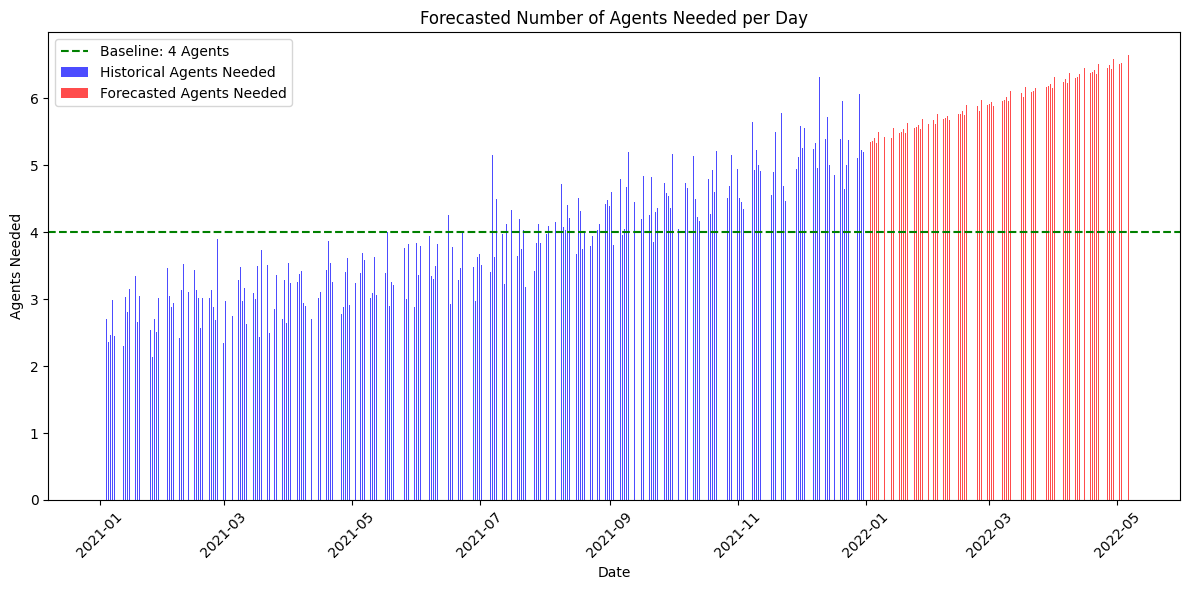

In [6]:
# Workforce Planning
work_seconds_per_agent = 36000  # 10 hours shift
aht = 300  # Average Handling Time in seconds (5 minutes)


agg = df.groupby('date').agg(
                            total_calls=('call_started', 'count'),
                            total_within_60s=('meets_standard', lambda x: x.sum()),
                            total__service_time=('call_duration', 'sum')
                            )   

#display(agg)

util_agent = cc.utilization_with_target(agg=agg,
                                        target_sl=0.9,  # Target service level of 90%
                                        num_agents=4,  # Current number of agents
                                        work_seconds_per_agent=work_seconds_per_agent  # 8 hours shift
                                        )

#display(util_agent)  

agent_needed = forecast_calls.apply(
                                    lambda x: cc.compute_needed_agents(
                                                                        total_service_seconds=x * aht,  # Assuming average call duration of 300 seconds
                                                                        work_seconds_per_agent=work_seconds_per_agent,  # 8 hours shift
                                                                        target_utilization=util_agent
                                                                        )   
                                    )                        
# #display(forecast_calls)
                            
#display(agent_needed)
agg['agents_needed'] = agg['total__service_time'] / work_seconds_per_agent / util_agent

#display(agg)
plt.figure(figsize=(12,6))

# Historical agents
plt.bar(agg.index, agg['agents_needed'], width=0.4, label="Historical Agents Needed", color="blue", alpha=0.7)

# Forecasted agents, shifted slightly to avoid overlap
plt.bar(agent_needed.index + pd.Timedelta(days=0.2), agent_needed.values, width=0.4, label="Forecasted Agents Needed", color="red", alpha=0.7)

# Baseline line at 4 agents
plt.axhline(4, color='green', linestyle='--', label="Baseline: 4 Agents")

plt.xlabel("Date")
plt.ylabel("Agents Needed")
plt.title("Forecasted Number of Agents Needed per Day")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

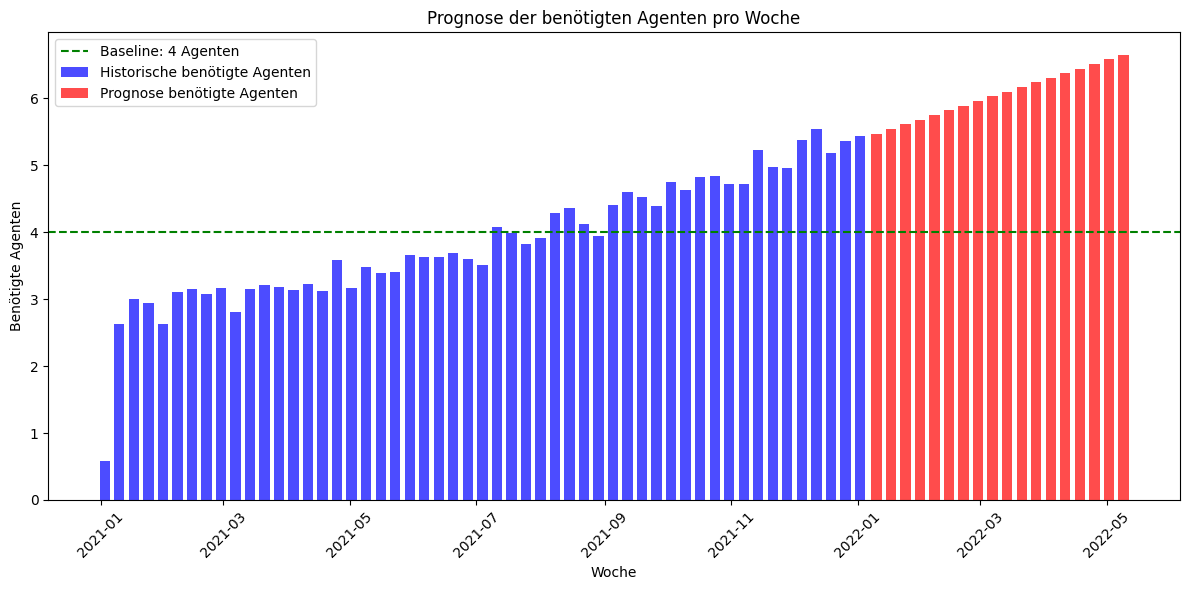

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

work_seconds_per_agent = 36000 * 5 # 10 hours shift
aht = 300  # Average Handling Time in seconds (5 minutes)

# --- Weekly aggregation ---
weekly_agg = df.resample('W', on='date').agg(
    total_calls=('call_started', 'count'),
    total_within_60s=('meets_standard', 'sum'),
    total_service_time=('call_duration', 'sum')
)

util_agent = cc.utilization_with_target(agg=weekly_agg,
                                        target_sl=0.9,  # Target service level of 90%
                                        num_agents=4,  # Current number of agents
                                        work_seconds_per_agent=work_seconds_per_agent
                                        )

# --- Historical weekly agents needed ---
weekly_agg['weekly_agents_needed'] = weekly_agg['total_service_time'] / (work_seconds_per_agent * util_agent)

# --- Weekly forecast agents ---
weekly_forecast_calls = forecast_calls.resample('W').sum()
weekly_forecast_agents = weekly_forecast_calls.apply(
    lambda x: cc.compute_needed_agents(
        total_service_seconds=x * aht,
        work_seconds_per_agent=work_seconds_per_agent,
        target_utilization=util_agent
    )
)

# --- Plotting ---
plt.figure(figsize=(12,6))

# Historische Agenten
plt.bar(weekly_agg.index, weekly_agg['weekly_agents_needed'], width=5, label="Historische benötigte Agenten", color="blue", alpha=0.7)

# Forecast Agenten (verschoben für bessere Sichtbarkeit)
plt.bar(weekly_forecast_agents.index + pd.Timedelta(days=1), weekly_forecast_agents.values, width=5, label="Prognose benötigte Agenten", color="red", alpha=0.7)

# Baseline Linie bei 4 Agenten
plt.axhline(4, color='green', linestyle='--', label="Baseline: 4 Agenten")

plt.xlabel("Woche")
plt.ylabel("Benötigte Agenten")
plt.title("Prognose der benötigten Agenten pro Woche")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# --- Save figure ---
save_path = "../data/processed/weekly_agents_needed_forecast.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()


In [17]:
import math
import pandas as pd

def required_aht_from_agg(agg: pd.DataFrame, num_agents: int, target_sl: float, period_sec: int, threshold_sec: int = 60, tol: float = 1e-3, max_aht: int = 300):
    """
    Berechne die maximal erlaubte AHT pro Periode basierend auf aggregierten Daten (agg).

    Parameters
    ----------
    agg : DataFrame
        DataFrame mit Spalte 'total_calls'
    num_agents : int
        Anzahl der Agenten
    target_sl : float
        Ziel-Servicelevel (z.B. 0.9 für 90%)
    period_sec : int
        Länge der Periode in Sekunden (z.B. 8*3600 für eine Schicht, 5*8*3600 für eine Woche)
    threshold_sec : int
        Wartezeit-Schwelle für den Servicelevel (Standard: 60 Sekunden)
    tol : float
        Toleranz für binäre Suche
    max_aht : int
        Maximale AHT in Sekunden, die geprüft wird

    Returns
    -------
    Series
        Maximal erlaubte AHT (Sekunden) pro Periode
    """

    def service_level(calls, aht_sec):
        traffic = calls * aht_sec / period_sec
        if traffic >= num_agents or traffic == 0:
            return 0.0
        # Erlang C probability
        erlang_sum = sum((traffic ** n) / math.factorial(n) for n in range(num_agents))
        erlang_c_prob = (traffic ** num_agents / math.factorial(num_agents)) / \
                        (erlang_sum + (traffic ** num_agents / math.factorial(num_agents)) * (num_agents / (num_agents - traffic)))
        return 1 - erlang_c_prob * math.exp(-(num_agents - traffic) * (threshold_sec / aht_sec))

    def find_aht(calls):
        low, high = 1, max_aht
        while low < high:
            mid = (low + high) / 2
            if service_level(calls, mid) >= target_sl:
                low = mid + tol
            else:
                high = mid - tol
            if abs(high - low) < tol:
                break
        return round((low + high) / 2, 2)

    return agg['total_calls'].apply(find_aht)


In [55]:
import pandas as pd

def compute_required_aht(
    agg: pd.DataFrame,
    target_sl: float = 0.9,
    num_agents: int = 4,
    period_sec: int = 36000,  # Arbeitszeit pro Agent in Sekunden
    target_utilization: float = 0.8,
    drop_first_row: bool = False
) -> pd.Series:
    """
    Berechnet die benötigte Average Handling Time (AHT) pro Periode
    unter Berücksichtigung des Service Levels und der Agentenverfügbarkeit.
    
    Parameters
    ----------
    agg : pd.DataFrame
        DataFrame mit mindestens den Spalten 'total_calls' und 'servicelevel'.
    target_sl : float
        Ziel-Service-Level (0-1).
    num_agents : int
        Anzahl verfügbarer Agenten.
    period_sec : int
        Arbeitszeit pro Agent in Sekunden (pro Periode).
    target_utilization : float
        gewünschte Auslastung der Agenten (0-1)
    drop_first_row : bool
        Wenn True, wird die erste Zeile von agg entfernt.
    
    Returns
    -------
    pd.Series
        Benötigte AHT pro Periode in Sekunden.
    """
    if drop_first_row:
        agg = agg.iloc[1:]

    if "total_calls" not in agg or "service_level" not in agg:
        raise ValueError("DataFrame muss 'total_calls' und 'service_level' enthalten")
    
    # effektive verfügbare Sekunden pro Periode
    effective_work_seconds = num_agents * period_sec * target_utilization

    # tatsächlicher Service Level der Periode
    achieved_sl = agg["service_level"].mean()  # durchschnittlicher SL über die Zeilen
    sl_factor = target_sl / achieved_sl
    
    # Sicherstellen, dass der SL-Faktor nicht kleiner als 1 wird
    if isinstance(sl_factor, pd.Series):
        sl_factor = sl_factor.clip(lower=1.0)
    else:
        sl_factor = max(sl_factor, 1.0)

    # Berechnung der benötigten AHT
    required_aht = effective_work_seconds / (agg["total_calls"] * sl_factor)

    return required_aht


In [33]:
display(weekly_agg.head())

,total_calls,total_within_60s,total_service_time,service_level,agent_utilization,weekly_agents_needed,required_aht
date,,,,,,,
2021-01-03,143,142,44249.0,0.993007,0.061457,0.589238,1680.454960
2021-01-10,683,665,197729.0,0.973646,0.274624,2.633040,351.837568
2021-01-17,704,678,225235.0,0.963068,0.312826,2.999321,341.342414
2021-01-24,716,700,220490.0,0.977654,0.306236,2.936135,335.621591
2021-01-31,656,641,197151.0,0.977134,0.273821,2.625343,366.318688


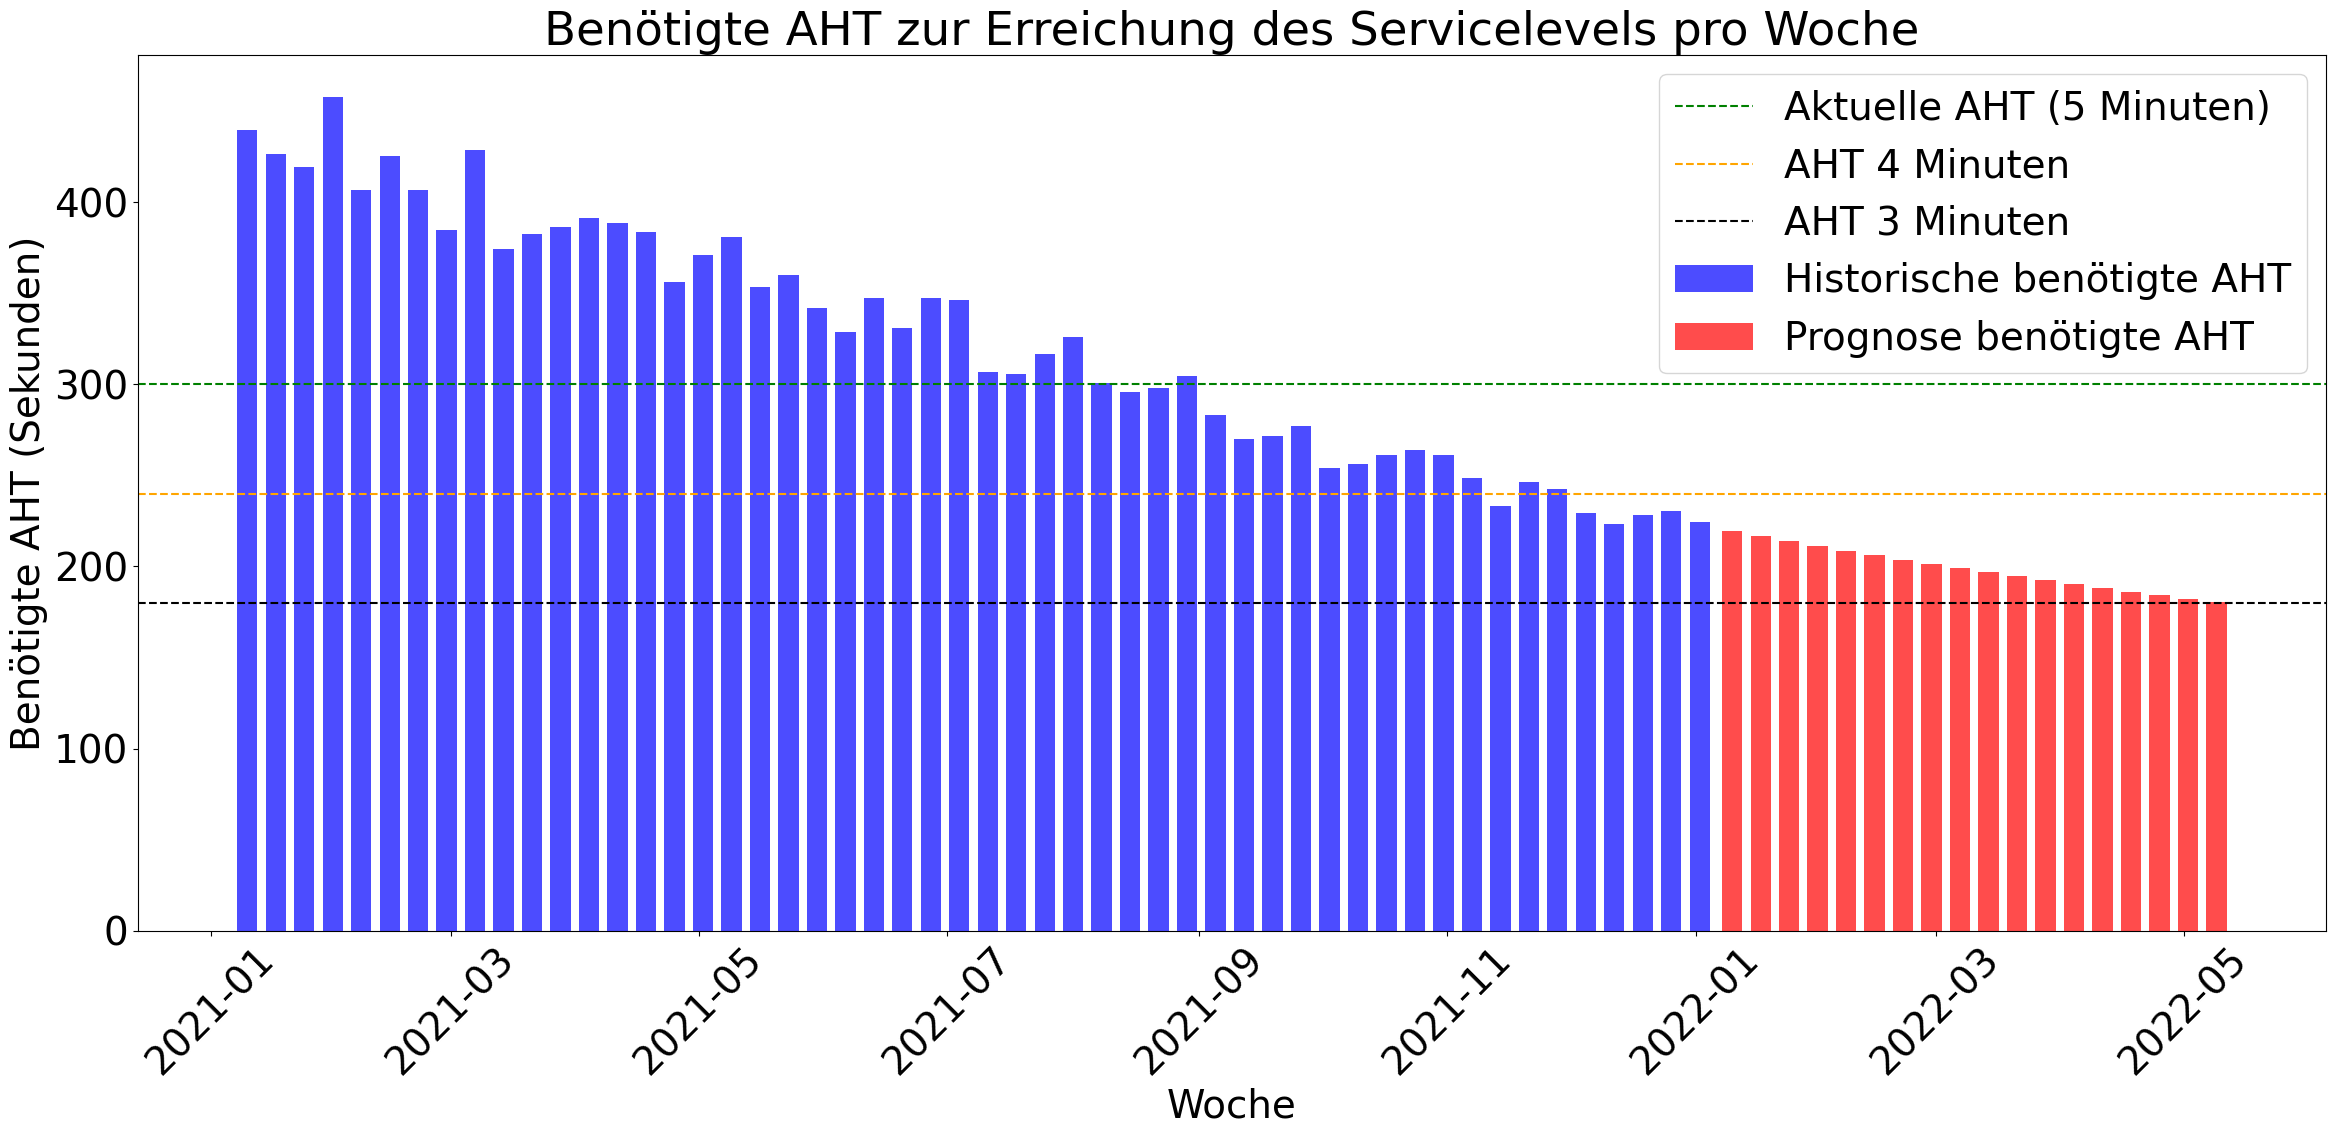

In [73]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 28}) 

agent_work_seconds = 36000 * 5  # 10 hours shift per week

weekly_agg['required_aht'] = compute_required_aht(
    agg=weekly_agg,
    num_agents=4,
    target_sl=0.9,
    period_sec=agent_work_seconds,
    target_utilization=util_agent,
    drop_first_row=True
)


weekly_forecast_required_aht = compute_required_aht(
    agg=pd.DataFrame({'total_calls': weekly_forecast_calls,
                     'service_level': 0.9}),  # Dummy SL, da nicht verwendet
    num_agents=4,
    target_sl=0.9,
    period_sec=agent_work_seconds,
    target_utilization=util_agent
)

# --- Plot ---
plt.figure(figsize=(24,12))

# Historische benötigte AHT
plt.bar(weekly_agg.index, weekly_agg['required_aht'].to_numpy(), width=5, label="Historische benötigte AHT", color="blue", alpha=0.7)

# Forecast benötigte AHT (leicht verschoben)
plt.bar(weekly_forecast_required_aht.index + pd.Timedelta(days=1), 
        weekly_forecast_required_aht.to_numpy(), 
        width=5, label="Prognose benötigte AHT", color="red", alpha=0.7)

# Baseline bei 300 Sekunden (5 Minuten)
plt.axhline(300, color="green", linestyle="--", label="Aktuelle AHT (5 Minuten)")
plt.axhline(240, color="orange", linestyle="--", label="AHT 4 Minuten")
plt.axhline(180, color="black", linestyle="--", label="AHT 3 Minuten")

plt.xlabel("Woche")
plt.ylabel("Benötigte AHT (Sekunden)")
plt.title("Benötigte AHT zur Erreichung des Servicelevels pro Woche")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("../data/processed/required_aht_forecast.png", dpi=800, bbox_inches="tight")
plt.show()
